# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [3]:
cities# Printing cities

['san patricio',
 'fortuna',
 'tiksi',
 'stanley',
 'port-aux-francais',
 'port lincoln',
 'diego de almagro',
 'adamstown',
 'marsaskala',
 'waitangi',
 'arteche',
 'lazaro cardenas',
 'puerto natales',
 'chonchi',
 'saint-philippe',
 'faya-largeau',
 'shira',
 'mozhaysk',
 'new norfolk',
 'west fargo',
 'anadyr',
 'kolokani',
 'hasaki',
 'axim',
 'memmingen',
 'remire-montjoly',
 'zhoushan',
 'flying fish cove',
 'bethel',
 'port elizabeth',
 'lihue',
 'grytviken',
 'whitehorse',
 'georgetown',
 'avarua',
 'labrador city',
 'aasiaat',
 'ilulissat',
 'qaqortoq',
 'gaspe',
 'albany',
 'kamina',
 'kertih',
 'yardimli',
 'ushuaia',
 'tofol',
 'tolanaro',
 'benalla',
 'princeville',
 'egilsstadir',
 'yellowknife',
 'bilibino',
 'shahba',
 'qamdo',
 'papatowai',
 'sitka',
 'el gouna',
 'yarmouth',
 'vorgashor',
 'whitby',
 'taltal',
 'tura',
 'klaksvik',
 'hawaiian paradise park',
 'vingt cinq',
 'yakutsk',
 'punta arenas',
 'pundong',
 'duba',
 'weno',
 'moree',
 'kalemie',
 'north bend',

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date =  response['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | diego de almagro
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | marsaskala
City not found. Skipping...
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | arteche
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | faya-largeau
Processing Record 17 of Set 1 | shira
Processing Record 18 of Set 1 | mozhaysk
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | west fargo
Processing Record 21 of Set 1 | anadyr
Processing Recor

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,16.97,47,0,5.15,US,1741573650
1,fortuna,40.5982,-124.1573,12.51,63,0,6.17,US,1741573651
2,tiksi,71.6872,128.8694,-25.12,96,98,2.73,RU,1741573652
3,stanley,54.8680,-1.6985,-1.99,100,83,2.06,GB,1741573546
4,port-aux-francais,-49.3500,70.2167,7.43,91,100,12.58,TF,1741573654


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,16.97,47,0,5.15,US,1741573650
1,fortuna,40.5982,-124.1573,12.51,63,0,6.17,US,1741573651
2,tiksi,71.6872,128.8694,-25.12,96,98,2.73,RU,1741573652
3,stanley,54.8680,-1.6985,-1.99,100,83,2.06,GB,1741573546
4,port-aux-francais,-49.3500,70.2167,7.43,91,100,12.58,TF,1741573654


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

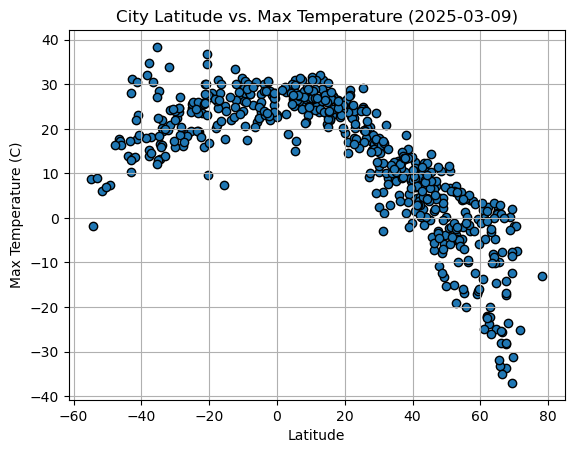

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k")

# Incorporate the other graph properties
c_date = datetime.now().strftime("%Y-%m-%d") # CUrrent day
plt.title(f"City Latitude vs. Max Temperature ({c_date})")# Add a title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)  

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

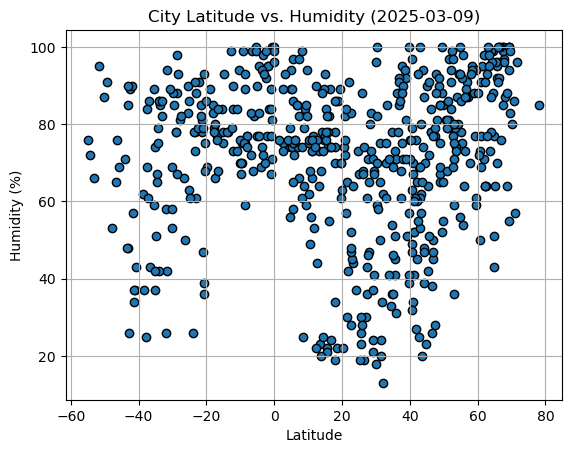

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({c_date})")# Add a title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)  

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

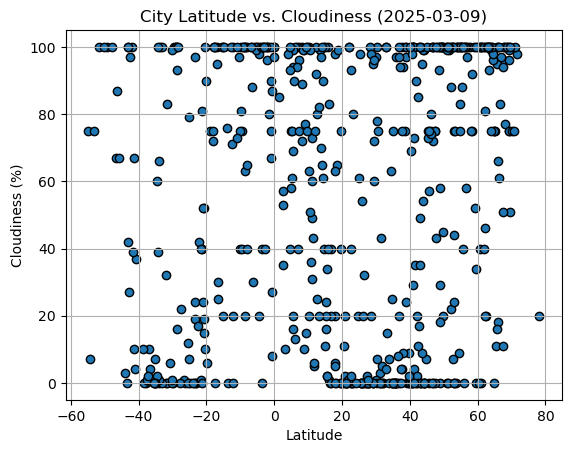

In [11]:
# Build the scatter plot for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({c_date})")  # Add a title
plt.xlabel("Latitude")  
plt.ylabel("Cloudiness (%)")  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

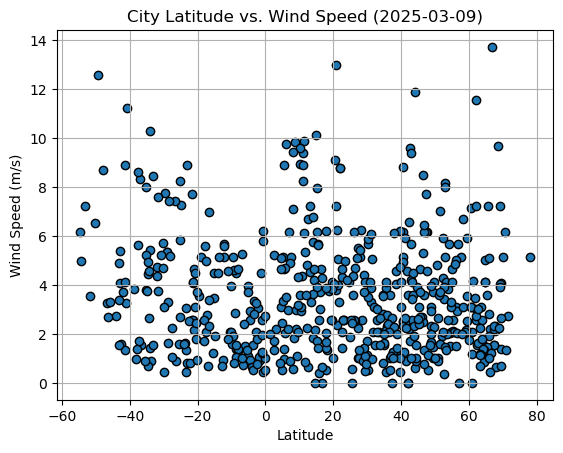

In [12]:
# Build the scatter plot for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({c_date})")  # Add a title
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)")  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plotting(x_values, y_values, title, xlabel, ylabel, save_path):
    # Defining and Calculating linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    regress_line = slope * x_values + intercept
    print(f"r^2-value is: {r_value**2}") # Printing r^2-value
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values, color="blue", edgecolor="black")
    plt.plot(x_values, regress_line, color="red",label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Adding title and labels to the graph
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    # Save the figure
    plt.savefig(save_path)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,16.97,47,0,5.15,US,1741573650
1,fortuna,40.5982,-124.1573,12.51,63,0,6.17,US,1741573651
2,tiksi,71.6872,128.8694,-25.12,96,98,2.73,RU,1741573652
3,stanley,54.8680,-1.6985,-1.99,100,83,2.06,GB,1741573546
9,arteche,12.2645,125.4048,26.78,90,92,4.81,PH,1741573660


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,7.43,91,100,12.58,TF,1741573654
5,port lincoln,-34.7333,135.8667,28.38,51,0,4.43,AU,1741573655
6,diego de almagro,-26.3667,-70.0500,19.17,50,0,0.89,CL,1741573656
7,adamstown,-25.0660,-130.1015,24.75,63,7,8.25,PN,1741573657
8,waitangi,-43.9535,-176.5597,13.97,71,3,2.73,NZ,1741573659


###  Temperature vs. Latitude Linear Regression Plot

r^2-value is: 0.7923633744725945


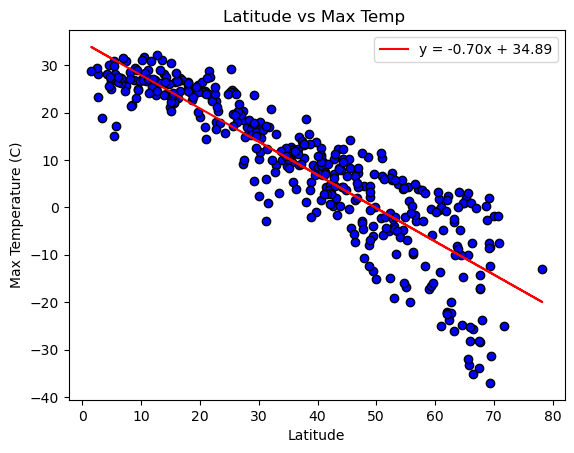

In [16]:


# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Max Temp ",
    xlabel="Latitude",
    ylabel="Max Temperature (C)",
    save_path="output_data/Northern_Temp_vs_Lat.png" )

r^2-value is: 0.28186618675115266


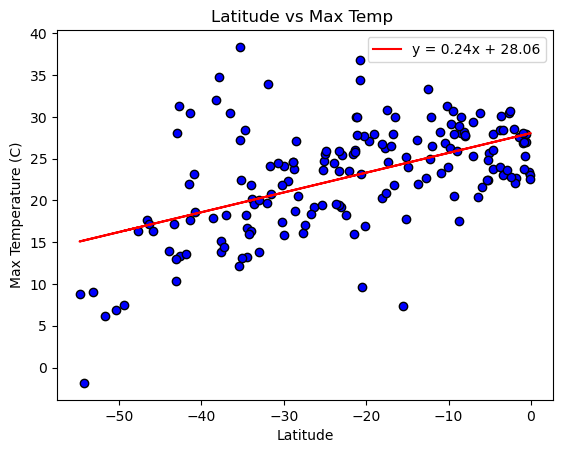

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Max Temp ",
    xlabel="Latitude",
    ylabel="Max Temperature (C)",
    save_path="output_data/Southern_Temp_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: Strong correlation (r² = 0.7924)—temperature decreases significantly as latitude increases.

Southern Hemisphere: Moderate correlation (r² = 0.2819)—weaker trend compared to the Northern Hemisphere, possibly due to geographical differences.

### Humidity vs. Latitude Linear Regression Plot

r^2-value is: 0.07081150843346365


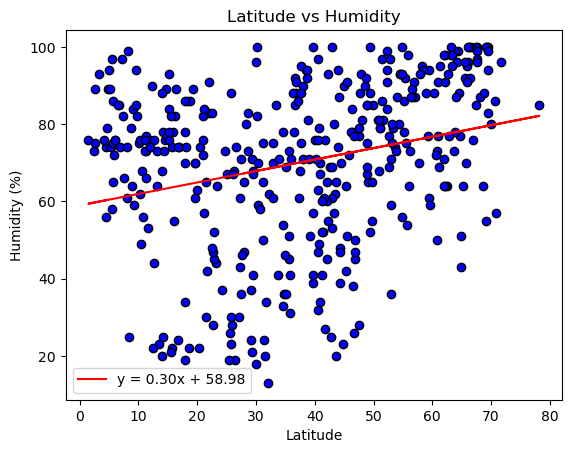

In [18]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Humidity",
    xlabel="Latitude",
    ylabel="Humidity (%)",
    save_path="output_data/Northern_Humidity_vs_Lat.png")


r^2-value is: 0.15660473535143007


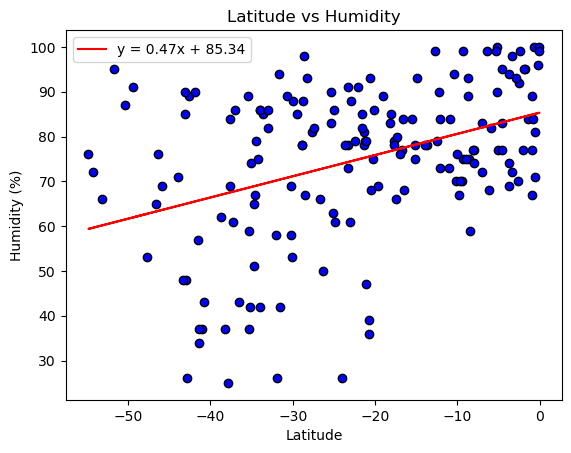

In [19]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Humidity",
    xlabel="Latitude",
    ylabel="Humidity (%)",
    save_path="output_data/Southern_Humidity_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: Weak correlation (r² = 0.0708)—latitude has little effect on humidity.

Southern Hemisphere: Weak correlation (r² = 0.1566)—latitude slightly influences humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

r^2-value is: 0.04543563119623892


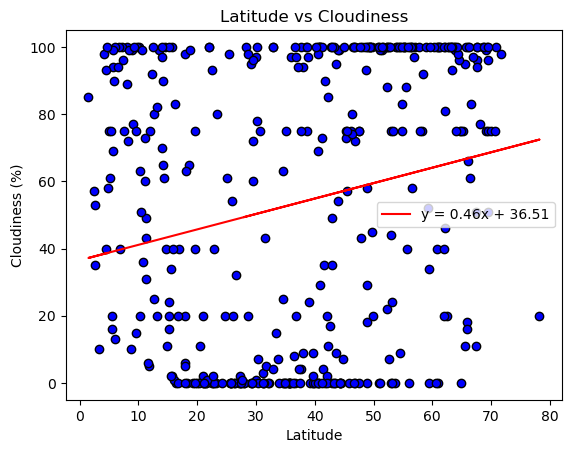

In [20]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Cloudiness",
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    save_path="output_data/Northern_Cloudiness_vs_Lat.png")

r^2-value is: 0.1052135438416481


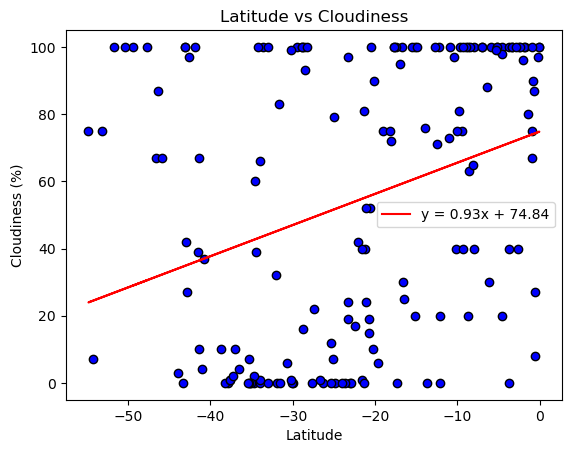

In [21]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Cloudiness",
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    save_path="output_data/Southern_Cloudiness_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: Minimal correlation (r² = 0.0454)—cloudiness is not latitude-dependent.

Southern Hemisphere: Weak correlation (r² = 0.1052)—latitude has a minor influence on cloudiness.



### Wind Speed vs. Latitude Linear Regression Plot

r^2-value is: 0.015596874741188461


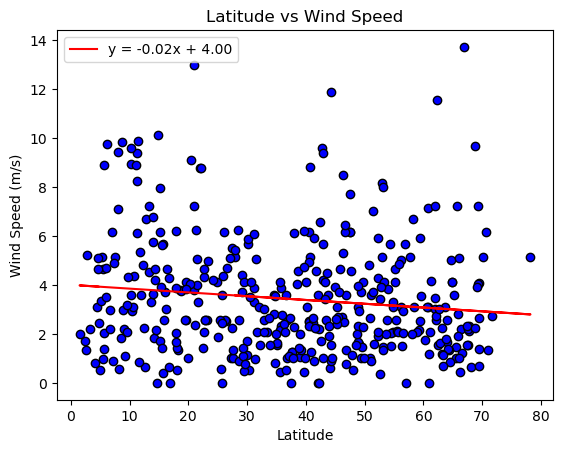

In [22]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Wind Speed",
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    save_path="output_data/Northern_WindSpeed_vs_Lat.png")

r^2-value is: 0.15028702793165835


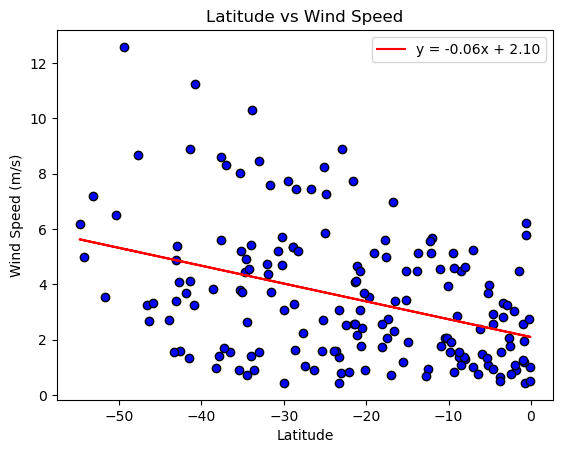

In [23]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Calling the linear regression function
linear_regression_plotting(
    x_values,
    y_values,
    title="Latitude vs Wind Speed",
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    save_path="output_data/Southern_WindSpeed_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: Virtually no correlation (r² = 0.0156)—wind speed is independent of latitude.

Southern Hemisphere: Weak correlation (r² = 0.1503)—latitude has some effect, though other factors dominate.